# Statistička analiza SoSci Data iz CSV v3.2

In [2]:
work_version_num = 3.2
work_version = f"v{work_version_num}"

print(work_version)

v3.2


# [1] Definirati stimuluse i nazivlje

In [3]:
# Define the stimuli
stimuli = ['apa',
           'ata',
           'aka',
           'aba',
           'ada',
           'aga',
           'asa',
           'aša',
           'aza',
           'aža',
           'afa',
           'aha',
           'aca',
           'ača',
           'ađa',
           'aja',
           'ana',
           'ama',
           'ara',
           'ala',
           'ava']

In [4]:
# Define the stimuli
stimuli_sosci =   ['apa',
                   'ata',
                   'aka',
                   'aba',
                   'ada',
                   'aga',
                   'asa',
                   'aša',
                   'aza',
                   'aža',
                   'aha',
                   'afa',
                   'aca',
                   'ača',
                   'ađa',
                   'ama',
                   'ana',
                   'aja',
                   'ara',
                   'ala',
                   'ava']

In [5]:
# Extract unique phonemes by removing 'a's
phonemes = [stimulus.replace('a', '') for stimulus in stimuli]
phonemes_sosci = [stimulus.replace('a', '') for stimulus in stimuli_sosci]

# Create a mapping from numbers to phonemes
phoneme_mapping = {i+1: phoneme for i, phoneme in enumerate(phonemes)}
phoneme_mapping_sosci = {i+1: phoneme for i, phoneme in enumerate(phonemes_sosci)}

# Output the phoneme mapping
print(f"phoneme_mapping\n{phoneme_mapping}\nphoneme_mapping_sosci\n{phoneme_mapping_sosci}")


phoneme_mapping
{1: 'p', 2: 't', 3: 'k', 4: 'b', 5: 'd', 6: 'g', 7: 's', 8: 'š', 9: 'z', 10: 'ž', 11: 'f', 12: 'h', 13: 'c', 14: 'č', 15: 'đ', 16: 'j', 17: 'n', 18: 'm', 19: 'r', 20: 'l', 21: 'v'}
phoneme_mapping_sosci
{1: 'p', 2: 't', 3: 'k', 4: 'b', 5: 'd', 6: 'g', 7: 's', 8: 'š', 9: 'z', 10: 'ž', 11: 'h', 12: 'f', 13: 'c', 14: 'č', 15: 'đ', 16: 'm', 17: 'n', 18: 'j', 19: 'r', 20: 'l', 21: 'v'}


## [2] Open CSV, extract, map

In [6]:
#data_path = r"C:\Users\Mr Cab Driver\Documents\A FAKS FFZG\Diplomski\Fonetika\DIPLOMSKI RAD\Data\data_porupski_2024-06-10_02-07.csv"
data_path_base = r"C:\Users\Mr Cab Driver\Documents\A FAKS FFZG\Diplomski\Fonetika\DIPLOMSKI RAD\Data"
data_version_name = r"\data_porupski_2024-06-10_02-07.csv"

data_path_csv = data_path_base + data_version_name

In [7]:
import pandas as pd

try:
    df = pd.read_csv(data_path_csv, encoding='utf-16', delimiter='\t')
    print("Successfully read the file with UTF-16 LE encoding and tab delimiter.\n")
except Exception as e:
    print(f"Failed to read the file: {e}")
    df = None

if df is not None:
    # Extract the columns of interest (S101-S184, S201-S284, and S301-S384)
    columns_of_interest = []

    for i in range(101, 185):
        columns_of_interest.append(f'S{i}')
    for i in range(201, 285):
        columns_of_interest.append(f'S{i}')
    for i in range(301, 385):
        columns_of_interest.append(f'S{i}')

    # Add the additional columns at the end
    additional_columns = ['dob', 'sluh', 'hrv']
    columns_of_interest.extend(additional_columns)

    # Extract only the columns of interest from the dataframe
    # Also make sure the necessary columns (DP02_01, DP05, DP06) are present
    required_columns = columns_of_interest[:-3] + ['DP02_01', 'DP05', 'DP06']
    
    if all(col in df.columns for col in required_columns):
        df_extracted = df[required_columns].copy()  # Create a copy of the DataFrame slice

        # Rename the DP columns to the additional columns
        df_extracted.rename(columns={'DP02_01': 'dob', 'DP05': 'sluh', 'DP06': 'hrv'}, inplace=True)

        # Reorder columns to have additional columns at the end
        final_columns = columns_of_interest
        df_final = df_extracted[final_columns]
        
        print("Extracted and renamed columns successfully.")
        df_final.at[0, 'dob'] = "1"
        df_final.at[0, 'sluh'] = "1"
        df_final.at[0, 'hrv'] = "1"
        print(df_final.head())
    else:
        print("Required columns are missing from the data.")
else:
    print("Dataframe is None.")


# Iterate over columns and rows, convert values to integers except for the first row
for col in df_final.columns:
    for i, val in enumerate(df_final[col]):
        if i != 0:  # Skip the first row
            try:
                df_final.at[i, col] = int(val)
            except ValueError:
                pass  # If conversion to int fails, leave the value as it is

df_final.at[0, 'dob'] = 0
df_final.at[0, 'sluh'] = 1
df_final.at[0, 'hrv'] = 1
        
print(f"\nData ROW 0 at S384 is now of {type(df_final.at[0, 'S384'])} type")
print(f"Data ROW 0 at sluh is now of {type(df_final.at[1, 'sluh'])} type")
print(f"Data ROWS 1-{len(df_final)} at sluh is now of {type(df_final.at[1, 'sluh'])} type")

print(f"Crude Sample size: {len(df_final)}") 



Successfully read the file with UTF-16 LE encoding and tab delimiter.

Extracted and renamed columns successfully.
  S101 S102 S103 S104 S105 S106 S107 S108 S109 S110  ... S378 S379 S380 S381  \
0    p    t    k    b    d    g    s    š    z    ž  ...    đ    j    n    m   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
2    1    1    3    4   17   18   17    8    2    9  ...   15   18   17   16   
3   16   20   16    2    2   16   16   16   17   16  ...   15    2   11   16   
4    4   17    3   20    6    1   11    8    2   15  ...   15   18   17   16   

  S382 S383 S384 dob sluh hrv  
0    r    l    v   1    1   1  
1  NaN  NaN  NaN  56    2   2  
2   19    4    4  22    1   1  
3   19   19    4  25    1   1  
4   19   21    4  21    1   1  

[5 rows x 255 columns]

Data ROW 0 at S384 is now of <class 'str'> type
Data ROW 0 at sluh is now of <class 'int'> type
Data ROWS 1-46 at sluh is now of <class 'int'> type
Crude Sample size: 46


In [8]:
import pandas as pd

# Count all the rows present in df_final
total_rows_before = len(df_final)

# Assuming df_final is already defined in your previous code
print(f"Total rows before dropping: {total_rows_before} rows")

# Check for NaN values in df_final
nan_rows = df_final[df_final.isna().any(axis=1)]
#print(nan_rows)

# Drop rows containing NaN values
df_final = df_final.dropna()

# Check for rows that do not contain the value 1 exclusively in the last two columns
non_one_rows = df_final.iloc[1:][(df_final.iloc[1:]['sluh'] != 1) & (df_final.iloc[1:]['hrv'] != 1)]

#print(non_one_rows)

# Drop rows that do not contain the value 1 exclusively in the last two columns
df_final = df_final[(df_final['sluh'] == 1) & (df_final['hrv'] == 1)]

# Count separately any dropped rows
rows_dropped_nan = len(nan_rows)
rows_dropped_not_one = len(non_one_rows)

# Reset the index after dropping rows
df_final = df_final.reset_index(drop=True)

print(f"Dropped nan rows: {rows_dropped_nan}")
print(f"Dropped sluh/hrv rows: {rows_dropped_not_one} \n")
print("DataFrame after dropping rows with NaN values and rows not containing the value 1 exclusively in the last two columns:\n")
print(df_final.head())

print(f"\nTOTAL SAMPLE SIZE: {len(df_final)} rows")

Total rows before dropping: 46 rows
Dropped nan rows: 1
Dropped sluh/hrv rows: 0 

DataFrame after dropping rows with NaN values and rows not containing the value 1 exclusively in the last two columns:

  S101 S102 S103 S104 S105 S106 S107 S108 S109 S110  ... S378 S379 S380 S381  \
0    p    t    k    b    d    g    s    š    z    ž  ...    đ    j    n    m   
1    1    1    3    4   17   18   17    8    2    9  ...   15   18   17   16   
2   16   20   16    2    2   16   16   16   17   16  ...   15    2   11   16   
3    4   17    3   20    6    1   11    8    2   15  ...   15   18   17   16   
4    4    2   11    4   21    3    7   11   20   19  ...   15   18   17   16   

  S382 S383 S384 dob sluh hrv  
0    r    l    v   0    1   1  
1   19    4    4  22    1   1  
2   19   19    4  25    1   1  
3   19   21    4  21    1   1  
4   19    1    4  21    1   1  

[5 rows x 255 columns]

TOTAL SAMPLE SIZE: 45 rows


### Average participant page

In [12]:
df_interest = df_final

# ignore if value 0
dob_values = df_interest['dob'][df_interest['dob'] != 0]

# Calculate sum and average of the filtered 'dob' column
sum_dob = dob_values.sum()
avg_dob = dob_values.mean()

# Print average of 'dob' column formatted to two decimals
print("Average of 'dob' column: {:.2f}".format(avg_dob))
print(f"\n")
print(f"Participants: {len(dob_values)}")

Average of 'dob' column: 22.23


Participants: 44


In [13]:
# Drop 'dob', 'sluh', and 'hrv' columns from df_interest
df_interest.drop(columns=['dob', 'sluh', 'hrv'], inplace=True)

# Print the DataFrame after dropping columns
print("DataFrame after dropping 'dob', 'sluh', and 'hrv' columns:")
print(df_interest.head())
print(f"\n")
print(df_interest.tail())

DataFrame after dropping 'dob', 'sluh', and 'hrv' columns:
  S101 S102 S103 S104 S105 S106 S107 S108 S109 S110  ... S375 S376 S377 S378  \
0    p    t    k    b    d    g    s    š    z    ž  ...    h    c    č    đ   
1    1    1    3    4   17   18   17    8    2    9  ...    1   13   14   15   
2   16   20   16    2    2   16   16   16   17   16  ...    2   13   14   15   
3    4   17    3   20    6    1   11    8    2   15  ...   19   13   14   15   
4    4    2   11    4   21    3    7   11   20   19  ...    1   13   14   15   

  S379 S380 S381 S382 S383 S384  
0    j    n    m    r    l    v  
1   18   17   16   19    4    4  
2    2   11   16   19   19    4  
3   18   17   16   19   21    4  
4   18   17   16   19    1    4  

[5 rows x 252 columns]


   S101 S102 S103 S104 S105 S106 S107 S108 S109 S110  ... S375 S376 S377 S378  \
40    1    2    3   21    5   21    7   10    9    5  ...   12   13   14   15   
41    1   11    3    4   19   17    8    5   18    5  ...   19   13 

### Turn df to string

In [14]:
# Create a new DataFrame df_string by mapping integers to phonemes using DataFrame.applymap
df_string = df_interest.map(lambda x: phoneme_mapping.get(x, x))

# Print the DataFrame df_string
print("DataFrame of strings (df_string) with phonemes:")
print(df_string.head())


DataFrame of strings (df_string) with phonemes:
  S101 S102 S103 S104 S105 S106 S107 S108 S109 S110  ... S375 S376 S377 S378  \
0    p    t    k    b    d    g    s    š    z    ž  ...    h    c    č    đ   
1    p    p    k    b    n    m    n    š    t    z  ...    p    c    č    đ   
2    j    l    j    t    t    j    j    j    n    j  ...    t    c    č    đ   
3    b    n    k    l    g    p    f    š    t    đ  ...    r    c    č    đ   
4    b    t    f    b    v    k    s    f    l    r  ...    p    c    č    đ   

  S379 S380 S381 S382 S383 S384  
0    j    n    m    r    l    v  
1    m    n    j    r    b    b  
2    t    f    j    r    r    b  
3    m    n    j    r    v    b  
4    m    n    j    r    p    b  

[5 rows x 252 columns]


# [9] Statistička obrada i Z-test

In [15]:
import pandas as pd

# Create a copy of df_string to store the binary marked data
df_stat_data = df_string.copy()

# Iterate over each column
for col in df_stat_data.columns:
    # Iterate over each row (excluding the first row)
    for i in range(1, len(df_stat_data)):
        # Compare cell value with the value in the first row of the same column
        if str(df_stat_data.at[i, col]) == df_stat_data.at[0, col]:
            # If values match, mark the cell as 1 (correct)
            df_stat_data.at[i, col] = 1
        else:
            # If values don't match, mark the cell as 0 (incorrect)
            df_stat_data.at[i, col] = 0

# Drop the 0th row
df_stat_data = df_stat_data.drop(0)

# Reindex the DataFrame
df_stat_data = df_stat_data.reset_index(drop=True)

# Convert marked cells to integers
df_stat_data.iloc[:, 1:] = df_stat_data.iloc[:, 1:].astype(int)

print(type(df_stat_data.at[0, 'S304']))
#print(df_stat_data.head)

<class 'int'>


In [18]:
# Compute correct response rates for each participant
correct_response_rates = df_stat_data.iloc[:, 1:].mean(axis=1)

# Convert correct_response_rates to float
correct_response_rates = correct_response_rates.astype(float)

# Set a threshold for low variability (e.g., standard deviation < 0.4)
threshold = 0.3

low_correct_participants = correct_response_rates[correct_response_rates < threshold]

# Print or further analyze the correct response rates
print(f"Low Correctness Participants (less than {threshold}):")
print(low_correct_participants)
print(low_correct_participants.index)

#print(low_correct_participants[7])


Low Correctness Participants (less than 0.3):
8     0.175299
9     0.247012
27    0.127490
28    0.247012
29    0.039841
dtype: float64
Index([8, 9, 27, 28, 29], dtype='int64')


In [19]:
# Calculate standard deviation for each participant's responses
response_variability = df_stat_data.iloc[:, 1:].std(axis=1)
print("response_variability:")
print(response_variability[:10])
# Set a threshold for low variability (e.g., standard deviation < 0.4)
threshold = 0.4

# Identify participants with low variability
low_variability_participants = response_variability[response_variability < threshold]

# Print or further analyze participants with low variability
print(f"\nParticipants with Low Variability:")
print(low_variability_participants)

response_variability:
0    0.500995
1    0.475537
2    0.500677
3    0.494914
4    0.500327
5    0.500104
6     0.49665
7    0.500518
8    0.380982
9    0.432135
dtype: object

Participants with Low Variability:
8     0.380982
27    0.334187
29    0.195975
dtype: object


In [20]:
from scipy.stats import zscore

df_stat_data_2 = df_stat_data.copy()

# Convert all values in df_stat_data_2 to numeric type
df_stat_data_2 = df_stat_data_2.apply(pd.to_numeric, errors='coerce')

# print("df_stat_data_2 (based on Z-scores):")
# print(df_stat_data_2)

# Drop rows with NaN values
df_stat_data_2 = df_stat_data_2.dropna()

# Now proceed with the calculation
response_variability_2 = df_stat_data_2.iloc[:, 1:].std(axis=1)

# Compute Z-scores for response variability
response_variability_zscores_2 = zscore(response_variability_2)

print("response_variability_zscores_2:")
print(response_variability_zscores_2[:10])

# Set a threshold for low variability based on Z-scores (e.g., Z-score < -1.96 for 95% confidence level)
zscore_threshold = 1.96  # Positive threshold
negative_zscore_threshold = -1.96  # Negative threshold

# Identify participants with low variability based on Z-scores
low_variability_participants_zscores_2 = df_stat_data_2.index[(response_variability_zscores_2 < negative_zscore_threshold) | (response_variability_zscores_2 > zscore_threshold)]

# Print or further analyze participants with low variability based on Z-scores
print("Participants with Low Variability (based on Z-scores):")
print(low_variability_participants_zscores_2)


response_variability_zscores_2:
0    0.396966
1   -0.076027
2    0.391054
3    0.283991
4    0.384547
5    0.380403
6    0.316241
7    0.388097
8   -1.832795
9   -0.882400
dtype: float64
Participants with Low Variability (based on Z-scores):
Index([27, 29], dtype='int64')


In [21]:
# Convert indices to sets to ensure uniqueness
low_correct_set = set(low_correct_participants.index)
low_variability_set = set(low_variability_participants.index)
low_variability_zscores_set = set(low_variability_participants_zscores_2)

# Combine all sets into a single set (union)
combined_indices = low_correct_set.union(low_variability_set, low_variability_zscores_set)

# Print the combined indices
print("Combined Indices:")
print(combined_indices)


Combined Indices:
{8, 9, 27, 28, 29}


In [22]:
# Create a copy of df_stat_data to store the modified data
df_stat_data_fin = df_string.copy()

# Remove rows corresponding to low correct response rates
df_stat_data_fin = df_stat_data_fin.drop(combined_indices)

# Reset the index after removing rows
df_stat_data_fin = df_stat_data_fin.reset_index(drop=True)

print(f"Total participants: {len(df_stat_data)}")
print(f"Lacking: {len(combined_indices)}")
print(f"Drop Index: {combined_indices}")
print(f"Valid participants: {len(df_stat_data_fin)}\n")

print(df_stat_data_fin.head())

print(df_stat_data_fin.tail())


Total participants: 44
Lacking: 5
Drop Index: {8, 9, 27, 28, 29}
Valid participants: 40

  S101 S102 S103 S104 S105 S106 S107 S108 S109 S110  ... S375 S376 S377 S378  \
0    p    t    k    b    d    g    s    š    z    ž  ...    h    c    č    đ   
1    p    p    k    b    n    m    n    š    t    z  ...    p    c    č    đ   
2    j    l    j    t    t    j    j    j    n    j  ...    t    c    č    đ   
3    b    n    k    l    g    p    f    š    t    đ  ...    r    c    č    đ   
4    b    t    f    b    v    k    s    f    l    r  ...    p    c    č    đ   

  S379 S380 S381 S382 S383 S384  
0    j    n    m    r    l    v  
1    m    n    j    r    b    b  
2    t    f    j    r    r    b  
3    m    n    j    r    v    b  
4    m    n    j    r    p    b  

[5 rows x 252 columns]
   S101 S102 S103 S104 S105 S106 S107 S108 S109 S110  ... S375 S376 S377 S378  \
35    p    t    k    v    d    v    s    ž    z    d  ...    h    c    č    đ   
36    p    f    k    b    r    n    š   

### Izrada Dictionary

In [23]:
# Initialize the nested dictionary structure
nested_dict = {
    'S1': {f'{i:02d}': {} for i in range(1, 85)},
    'S2': {f'{i:02d}': {} for i in range(1, 85)},
    'S3': {f'{i:02d}': {} for i in range(1, 85)}
}

# Populate the dictionary with the counts of all answers, excluding the first row
for col in df_stat_data_fin.columns:
    s_prefix = col[0:2]  # 'S1', 'S2', or 'S3'
    s_suffix = col[2:]   # '01' to '84'
    
    # Exclude the first row (index 0) from value counts
    answer_counts = df_stat_data_fin[col].iloc[1:].value_counts().to_dict()
    
    nested_dict[s_prefix][s_suffix] = answer_counts

print(f"Dict created, checking len of S1 condition: {len(nested_dict['S1'])}\n")


Dict created, checking len of S1 condition: 84



In [24]:
def print_dict(d, indent=0):
    for key, value in d.items():
        if isinstance(value, dict):
            print("  " * indent + f"{key}:")
            print_dict(value, indent + 1)
        else:
            print("  " * indent + f"{key}: {value}")

def print_dict_with_sums(d, indent=0):
    for key, value in d.items():
        if isinstance(value, dict):
            print("  " * indent + f"{key}:")
            print_dict_with_sums(value, indent + 1)
            total_sum = sum(value.values()) if all(isinstance(v, int) for v in value.values()) else 0
            print("  " * (indent + 1) + f"Total sum for {key}: {total_sum}")
        else:
            print("  " * indent + f"{key}: {value}")

In [ ]:
print_dict_with_sums(nested_dict)

## [3] Dict sa svim odgovorima

In [26]:
# Print a specific S1 subsection, for example, S101
print("\nSubsection for S101:")
print(nested_dict['S1']['01'])

# Print a specific S2 subsection, for example, S202
print("\nSubsection for S202:")
print(nested_dict['S2']['02'])

# Print a specific S3 subsection, for example, S303
print("\nSubsection for S303:")
print(nested_dict['S3']['03'])



Subsection for S101:
{'p': 17, 'b': 12, 't': 3, 'j': 2, 'l': 2, 'g': 1, 'š': 1, 'f': 1}

Subsection for S202:
{'t': 15, 'k': 5, 'r': 4, 'p': 3, 'b': 3, 'g': 3, 'l': 3, 'v': 1, 'd': 1, 'f': 1}

Subsection for S303:
{'k': 17, 'p': 7, 't': 5, 'b': 2, 'f': 2, 'v': 2, 'l': 1, 'š': 1, 'h': 1, 'g': 1}


### [4] Save Dict

In [27]:
data_path_base = r"C:\Users\Mr Cab Driver\Documents\A FAKS FFZG\Diplomski\Fonetika\DIPLOMSKI RAD\Data"
name_dict = f"\Sosci-data-sorted_{work_version}.json"

output_path_dict = data_path_base + name_dict

In [29]:
import json

# Save the dictionary to a JSON file
with open(output_path_dict, 'w') as f:
    json.dump(nested_dict, f)

print(f"Dictionary saved to {output_path_dict}")


Dictionary saved to C:\Users\Mr Cab Driver\Documents\A FAKS FFZG\Diplomski\Fonetika\DIPLOMSKI RAD\Data\Sosci-data-sorted_v3.2.json


# [5] Load Dict

In [30]:
import json

# Path to the JSON file
json_file_path = output_path_dict

# Load the JSON file into a dictionary
with open(json_file_path, 'r') as f:
    loaded_dict = json.load(f)

print(f"Dictionary loaded from {output_path_dict}")

# Now loaded_dict contains the data from the JSON file as a dictionary
# Print a specific S1 subsection, for example, S101
print("\nSubsection for S101:")
print(loaded_dict['S1']['01'])
subsection_counts1 = loaded_dict['S1']['01']
print("Ukupan broj odgovora: ", sum(subsection_counts1.values()))

# Print a specific S2 subsection, for example, S202
print("\nSubsection for S202:")
print(loaded_dict['S2']['02'])
subsection_counts2 = loaded_dict['S2']['02']
print("Ukupan broj odgovora: ", sum(subsection_counts2.values()))

# Print a specific S3 subsection, for example, S303
print("\nSubsection for S303:")
print(loaded_dict['S3']['03'])
subsection_counts3 = loaded_dict['S3']['03']
print("Ukupan broj odgovora: ", sum(subsection_counts3.values()))

Dictionary loaded from C:\Users\Mr Cab Driver\Documents\A FAKS FFZG\Diplomski\Fonetika\DIPLOMSKI RAD\Data\Sosci-data-sorted_v3.2.json

Subsection for S101:
{'p': 17, 'b': 12, 't': 3, 'j': 2, 'l': 2, 'g': 1, 'š': 1, 'f': 1}
Ukupan broj odgovora:  39

Subsection for S202:
{'t': 15, 'k': 5, 'r': 4, 'p': 3, 'b': 3, 'g': 3, 'l': 3, 'v': 1, 'd': 1, 'f': 1}
Ukupan broj odgovora:  39

Subsection for S303:
{'k': 17, 'p': 7, 't': 5, 'b': 2, 'f': 2, 'v': 2, 'l': 1, 'š': 1, 'h': 1, 'g': 1}
Ukupan broj odgovora:  39


# [6] After The Big Stat

In [31]:
# Check for existing dicts, first loaded, then generated (nested_dict)

if 'loaded_dict' in locals():
    print("Using loaded_dict.")
    stats_dict = loaded_dict
elif 'nested_dict' in locals():
    print("Using nested_dict.")
    stats_dict = nested_dict
else:
    print("Error: Neither loaded_dict nor nested_dict found.")


Using loaded_dict.


## [7] Combing data across all 21 phonemes

In [36]:
# Initialize combined_dict with empty dictionaries for each S and subsection
combined_dict = {
    'S1': {f'{i:02d}': {} for i in range(1, 22)},
    'S2': {f'{i:02d}': {} for i in range(1, 22)},
    'S3': {f'{i:02d}': {} for i in range(1, 22)}
}

# Define the indices to sum up
indices_to_sum = [0, 21, 42, 63]

# Loop through each S (S1, S2, S3)
for s in ['S1', 'S2', 'S3']:
    # Loop through each subsection of the current S
    for i in range(1, 22):
        # Initialize a combined entry for this subsection
        combined_entry = {}
        # Sum up counts for each phoneme across the 4 entries
        for index in indices_to_sum:
            key = f'{i + index:02d}'
            if key in stats_dict[s]:
                # print(f"Processing key {key} for {s}")
                subsection = stats_dict[s][key]  # Access the subsections correctly
                # print(f"Subsection: {subsection}")
                for phoneme, count in subsection.items():
                    if phoneme not in combined_entry:
                        combined_entry[phoneme] = count
                    else:
                        combined_entry[phoneme] += count
        # Add the combined entry to the corresponding subsection under the current S
        combined_dict[s][f'{i:02d}'] = combined_entry

print(f"All 4 stimuli speakers have been combined into a singular entry (from 84 to 21).")

#print(combined_dict)
#print_dict_with_sums(combined_dict)


All 4 stimuli speakers have been combined into a singular entry (from 84 to 21).


# [8] Confusion Matrix Man (x1 or x3)

percent_threshold: 2.5% of 156 is 3.9 (the treshold)


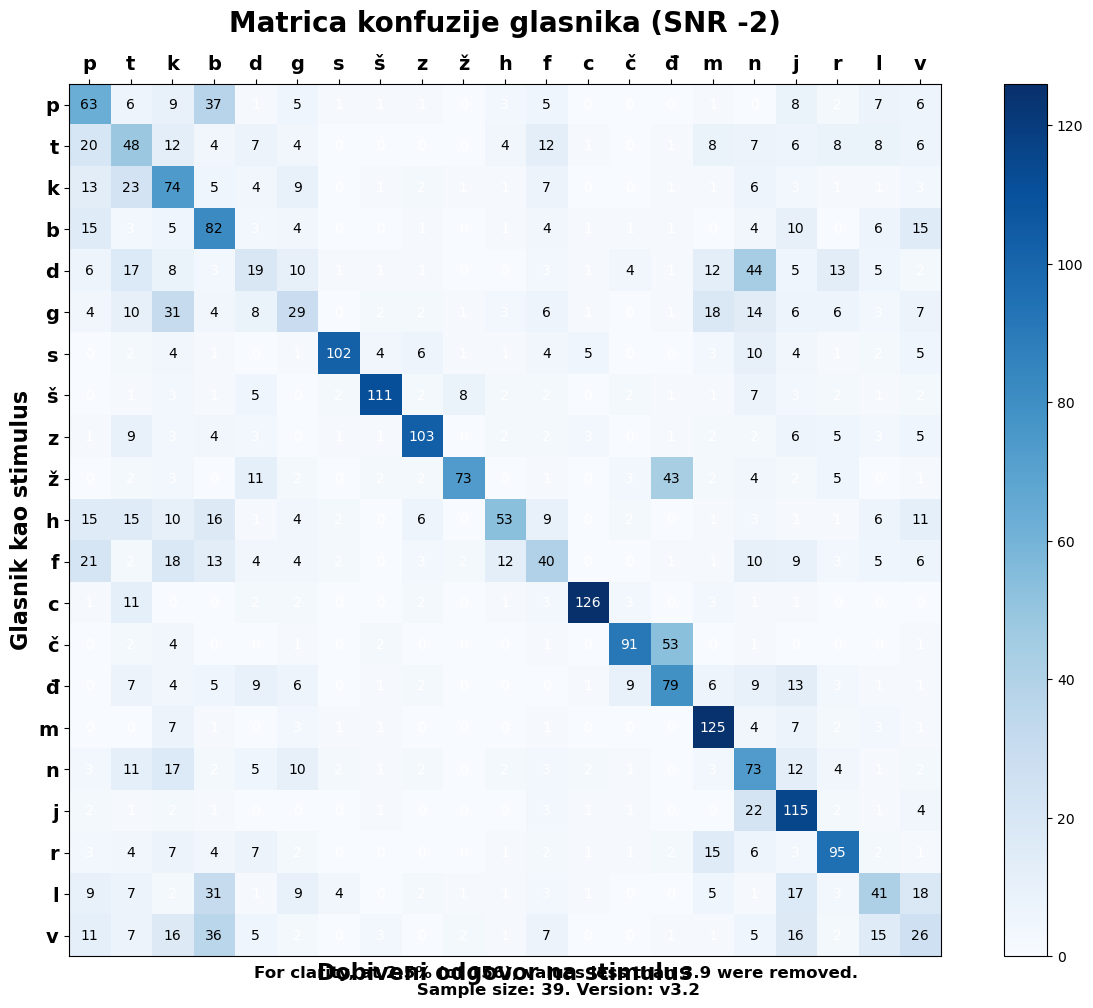

percent_threshold: 2.5% of 156 is 3.9 (the treshold)


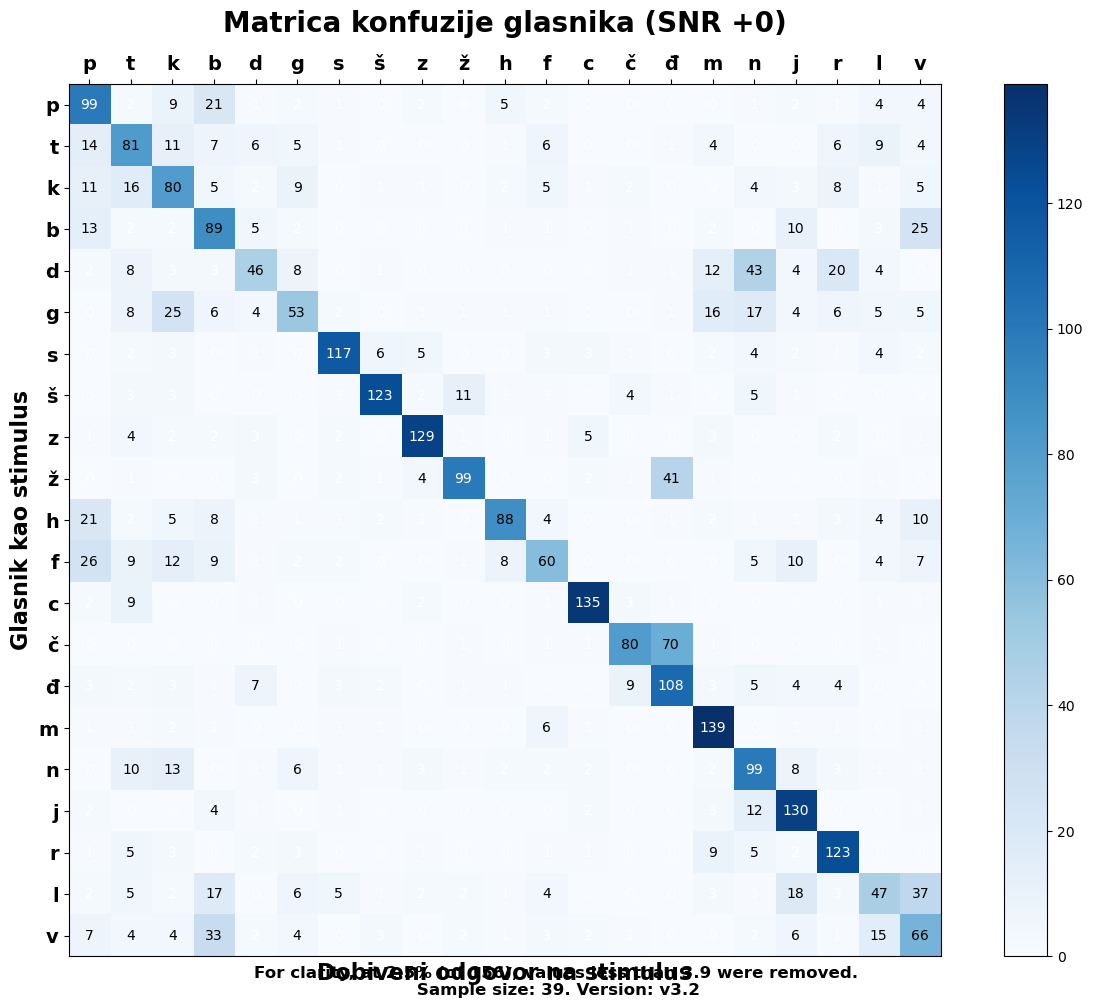

percent_threshold: 2.5% of 156 is 3.9 (the treshold)


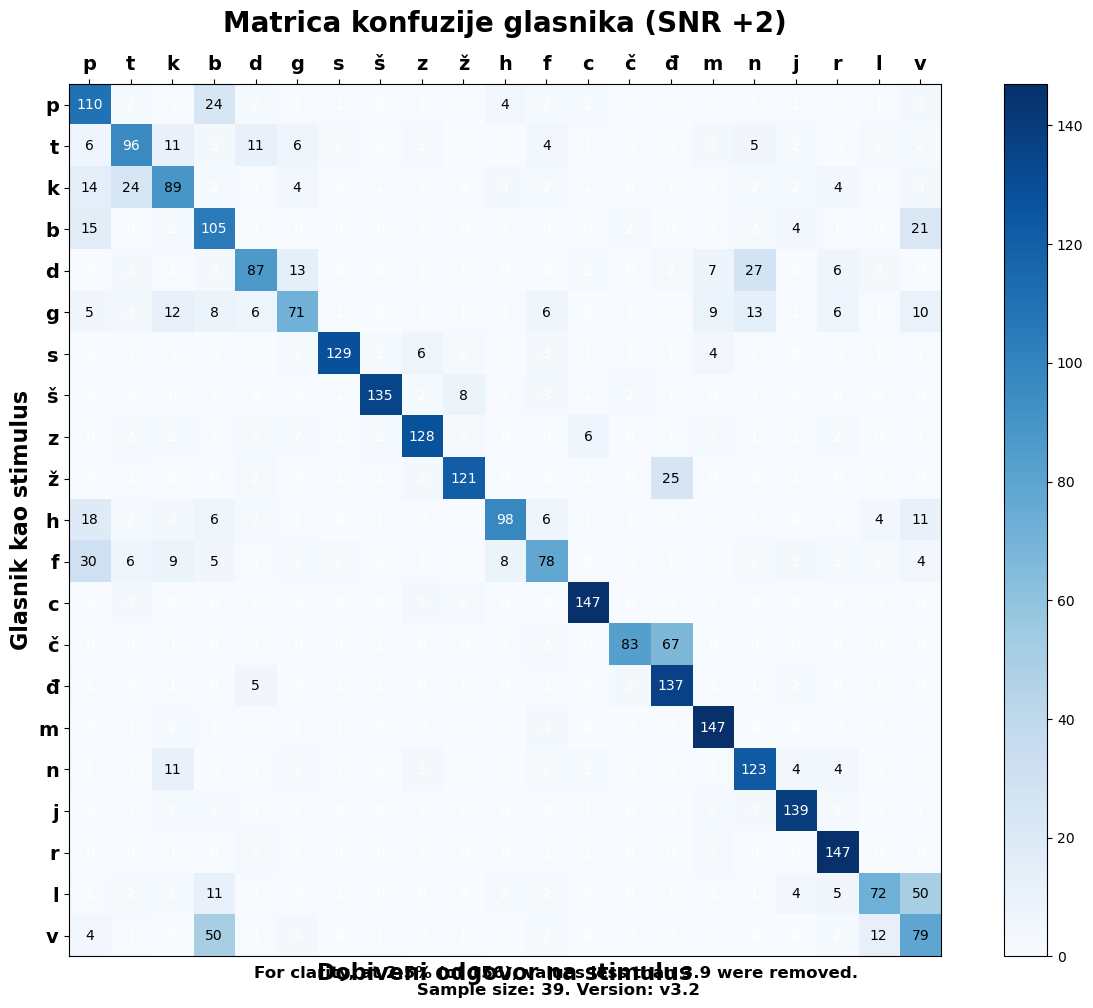

In [42]:
# import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import rgb_to_hsv

treshold = 0
print_kom = 1

# subsection_counts3 = loaded_dict['S3']['03']
# sub_sum_dict = sum(subsection_counts3.values())
# print(sub_sum_dict)

# Define the phonemes
phonemes = ['p', 't', 'k', 'b', 'd', 'g', 's', 'š', 'z', 'ž', 'h', 'f', 'c', 'č', 'đ', 'm', 'n', 'j', 'r', 'l', 'v']

# Define the correct answers mapping for S1 (shared for S2 and S3)
correct_answers = {
    'S1': {
        '01': 'p', '02': 't', '03': 'k', '04': 'b', '05': 'd', '06': 'g', '07': 's', '08': 'š', '09': 'z', '10': 'ž',
        '11': 'h', '12': 'f', '13': 'c', '14': 'č', '15': 'đ', '16': 'm', '17': 'n', '18': 'j', '19': 'r', '20': 'l',
        '21': 'v'
    }
}

snr_prefix_mapping = {
    'SNR -2': 'S1',
    'SNR +0': 'S2',
    'SNR +2': 'S3'
}

# Reverse the mapping to make it easier to lookup
reverse_snr_prefix_mapping = {v: k for k, v in snr_prefix_mapping.items()}

# Function to create and fill a confusion matrix
def create_confusion_matrix(combined_dict, correct_answers, session):
    confusion_matrix_data = pd.DataFrame(0, index=phonemes, columns=phonemes)
    for key, counts in combined_dict[session].items():
        true_phoneme = correct_answers['S1'][key]  # Use S1's correct answers for all sessions
        for phoneme, count in counts.items():
            confusion_matrix_data.loc[true_phoneme, phoneme] += count
    return confusion_matrix_data

# Create confusion matrices for each session
confusion_matrix_S1 = create_confusion_matrix(combined_dict, correct_answers, 'S1')
confusion_matrix_S2 = create_confusion_matrix(combined_dict, correct_answers, 'S2')
confusion_matrix_S3 = create_confusion_matrix(combined_dict, correct_answers, 'S3')

sessions = ['S1', 'S2', 'S3']

# Check the value of print_kom
if print_kom == 3:
    # Plot all three confusion matrices in one figure
    fig, axs = plt.subplots(3, 1, figsize=(13, 30))  # Adjust the figure size as needed
    
    confusion_matrices = [confusion_matrix_S1, confusion_matrix_S2, confusion_matrix_S3]

    for ax, session, confusion_matrix_data in zip(axs, sessions, confusion_matrices):
        cax = ax.matshow(confusion_matrix_data, cmap='Blues')

        # Calculate the total sum of the values in the DataFrame
        total_sum = confusion_matrix_data.iloc[0].sum()

        percent_treshold = 0.025
        
        # Calculate 5% of the total sum
        treshold = total_sum * percent_treshold
        
        # Add color bar
        plt.colorbar(cax, ax=ax)

        # Set labels
        ax.set_xticks(np.arange(len(phonemes)))
        ax.set_yticks(np.arange(len(phonemes)))
        ax.set_xticklabels(phonemes, fontweight='bold')
        ax.set_yticklabels(phonemes, fontweight='bold')

        # Add text annotations, leaving cells empty if value is 4 or less
        for i in range(len(phonemes)):
            for j in range(len(phonemes)):
                value = confusion_matrix_data.iloc[i, j]
                if value < treshold:
                    text_color = 'white'
                elif treshold <= value <= 90:
                    text_color = 'black'
                else:
                    text_color = 'white'
                ax.text(j, i, int(value), ha='center', va='center', color=text_color)

        snr_title = reverse_snr_prefix_mapping.get(session, 'Unknown SNR')
        ax.set_title(f'Matrica konfuzije glasnika ({snr_title})', fontsize=20, fontweight='bold')
        ax.set_xlabel('Dobiveni odgovor na stimulus', fontsize=16, fontweight='bold')
        ax.set_ylabel('Glasnik kao stimulus', fontsize=16, fontweight='bold')

    print(f"percent_threshold: {percent_treshold*100}% of {total_sum} is {treshold} (the treshold)")

    bottom_text = f"For clarity, at {percent_treshold*100}% (of {total_sum}), values less than {treshold} were removed.\n Sample size: {sub_sum_dict}"
    fig.text(0.5, 0.005, bottom_text, ha='center', fontsize=12, fontweight='bold')

    matrix_plot_version = f"\Matrica_konfuzije_glasnika_S1-S2-S3_{work_version}.png"
    matrix_path = data_path_base + matrix_plot_version
    # Save the plot as a PNG file
    plt.savefig(matrix_path)

    plt.tight_layout()
    plt.show()
else:
    # Plot each confusion matrix separately and save them individually
    confusion_matrices = [confusion_matrix_S1, confusion_matrix_S2, confusion_matrix_S3]
    
    for session, confusion_matrix_data in zip(sessions, confusion_matrices):
        fig, ax = plt.subplots(figsize=(13, 10))  # Adjust the figure size as needed
        cax = ax.matshow(confusion_matrix_data, cmap='Blues')

        # Calculate the total sum of the values in the DataFrame
        total_sum = confusion_matrix_data.iloc[0].sum()
        
        percent_treshold = 0.025
        
        # Calculate 5% of the total sum
        treshold = total_sum * percent_treshold
        
        # Add color bar
        plt.colorbar(cax, ax=ax)

        # Set labels
        ax.set_xticks(np.arange(len(phonemes)))
        ax.set_yticks(np.arange(len(phonemes)))
        ax.set_xticklabels(phonemes, fontsize=14, fontweight='bold')
        ax.set_yticklabels(phonemes, fontsize=14, fontweight='bold')

        # Add text annotations, leaving cells empty if value is 4 or less
        for i in range(len(phonemes)):
            for j in range(len(phonemes)):
                value = confusion_matrix_data.iloc[i, j]
                if value < treshold:
                    text_color = 'white'
                elif treshold <= value <= 90:
                    text_color = 'black'
                else:
                    text_color = 'white'
                ax.text(j, i, int(value), ha='center', va='center', color=text_color)

        snr_title = reverse_snr_prefix_mapping.get(session, 'Unknown SNR')
        ax.set_title(f'Matrica konfuzije glasnika ({snr_title})', fontsize=20, fontweight='bold', y=1.05)
        ax.set_xlabel('Dobiveni odgovor na stimulus', fontsize=16, fontweight='bold')
        ax.tick_params(axis='x', which='both', bottom=False)
        ax.set_ylabel('Glasnik kao stimulus', fontsize=16, fontweight='bold')

        print(f"percent_threshold: {percent_treshold*100}% of {total_sum} is {treshold:.1f} (the treshold)")

        bottom_text = f"For clarity, at {percent_treshold*100}% (of {total_sum}), values less than {treshold:.1f} were removed.\n Sample size: {sub_sum_dict}. Version: {work_version}"
        fig.text(0.5, 0.005, bottom_text, ha='center', fontsize=12, fontweight='bold')

        matrix_plot_version = f"\Matrica_konfuzije_glasnika_{session}_{work_version}.png"
        matrix_path = data_path_base + matrix_plot_version
        # Save the plot as a PNG file
        plt.savefig(matrix_path)

        plt.tight_layout()
        plt.show()


Processing 01 for true phoneme p
Adding 72 to cell (p, p)
Adding 56 to cell (p, b)
Adding 12 to cell (p, t)
Adding 8 to cell (p, j)
Adding 8 to cell (p, l)
Adding 4 to cell (p, g)
Adding 4 to cell (p, n)
Adding 4 to cell (p, v)
Adding 4 to cell (p, š)
Adding 4 to cell (p, f)
Processing 02 for true phoneme t
Adding 28 to cell (t, p)
Adding 24 to cell (t, k)
Adding 20 to cell (t, l)
Adding 20 to cell (t, r)
Adding 16 to cell (t, n)
Adding 12 to cell (t, t)
Adding 12 to cell (t, g)
Adding 12 to cell (t, d)
Adding 12 to cell (t, f)
Adding 8 to cell (t, v)
Adding 4 to cell (t, đ)
Adding 4 to cell (t, b)
Adding 4 to cell (t, j)
Processing 03 for true phoneme k
Adding 76 to cell (k, k)
Adding 20 to cell (k, t)
Adding 16 to cell (k, f)
Adding 16 to cell (k, g)
Adding 12 to cell (k, v)
Adding 8 to cell (k, b)
Adding 8 to cell (k, p)
Adding 4 to cell (k, j)
Adding 4 to cell (k, h)
Adding 4 to cell (k, d)
Adding 4 to cell (k, l)
Adding 4 to cell (k, č)
Processing 04 for true phoneme b
Adding 48 t

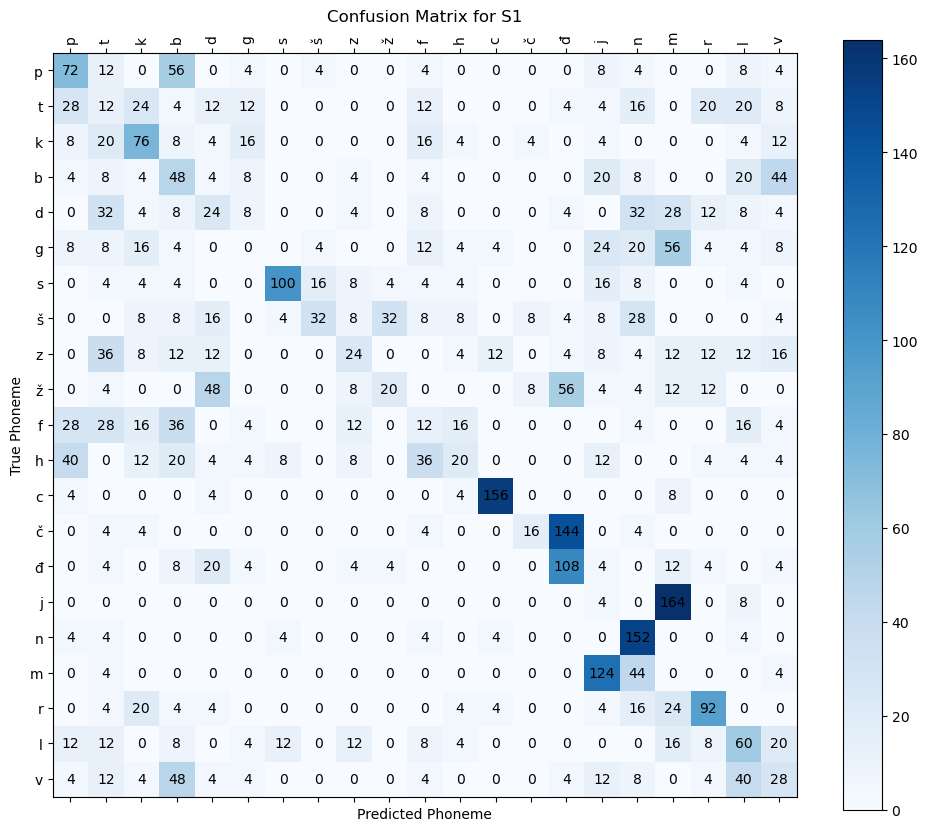

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the phonemes
phonemes = ['p', 't', 'k', 'b', 'd', 'g', 's', 'š', 'z', 'ž', 'f', 'h', 'c', 'č', 'đ', 'j', 'n', 'm', 'r', 'l', 'v']

# Define the correct answers mapping
correct_answers = {
    'S1': {
        '01': 'p', '02': 't', '03': 'k', '04': 'b', '05': 'd', '06': 'g', '07': 's', '08': 'š', '09': 'z', '10': 'ž',
        '11': 'f', '12': 'h', '13': 'c', '14': 'č', '15': 'đ', '16': 'j', '17': 'n', '18': 'm', '19': 'r', '20': 'l',
        '21': 'v'
    }
}

# Initialize a confusion matrix DataFrame
confusion_matrix_data = pd.DataFrame(0, index=phonemes, columns=phonemes)

# Function to fill confusion matrix
def fill_confusion_matrix(combined_dict, correct_answers, confusion_matrix_data):
    for key, counts in combined_dict['S1'].items():
        true_phoneme = correct_answers['S1'][key]
        print(f"Processing {key} for true phoneme {true_phoneme}")
        for phoneme, count in counts.items():
            print(f"Adding {count} to cell ({true_phoneme}, {phoneme})")
            confusion_matrix_data.loc[true_phoneme, phoneme] += count

# Fill the confusion matrix for S1
fill_confusion_matrix(combined_dict, correct_answers, confusion_matrix_data)

# Print the confusion matrix to debug
print("Confusion Matrix Data:")
print(confusion_matrix_data)

# Plot using Matplotlib
fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.matshow(confusion_matrix_data, cmap='Blues')

# Add color bar
plt.colorbar(cax)

# Set labels
ax.set_xticks(np.arange(len(phonemes)))
ax.set_yticks(np.arange(len(phonemes)))
ax.set_xticklabels(phonemes, rotation=90)
ax.set_yticklabels(phonemes)

# Add text annotations
for i in range(len(phonemes)):
    for j in range(len(phonemes)):
        ax.text(j, i, int(confusion_matrix_data.iloc[i, j]), ha='center', va='center', color='black')

plt.title('Confusion Matrix for S1')
plt.xlabel('Predicted Phoneme')
plt.ylabel('True Phoneme')
plt.show()


Processing 01 for true phoneme p
Adding 72 to cell (p, p)
Adding 56 to cell (p, b)
Adding 12 to cell (p, t)
Adding 8 to cell (p, j)
Adding 8 to cell (p, l)
Adding 4 to cell (p, g)
Adding 4 to cell (p, n)
Adding 4 to cell (p, v)
Adding 4 to cell (p, š)
Adding 4 to cell (p, f)
Processing 02 for true phoneme t
Adding 28 to cell (t, p)
Adding 24 to cell (t, k)
Adding 20 to cell (t, l)
Adding 20 to cell (t, r)
Adding 16 to cell (t, n)
Adding 12 to cell (t, t)
Adding 12 to cell (t, g)
Adding 12 to cell (t, d)
Adding 12 to cell (t, f)
Adding 8 to cell (t, v)
Adding 4 to cell (t, đ)
Adding 4 to cell (t, b)
Adding 4 to cell (t, j)
Processing 03 for true phoneme k
Adding 76 to cell (k, k)
Adding 20 to cell (k, t)
Adding 16 to cell (k, f)
Adding 16 to cell (k, g)
Adding 12 to cell (k, v)
Adding 8 to cell (k, b)
Adding 8 to cell (k, p)
Adding 4 to cell (k, j)
Adding 4 to cell (k, h)
Adding 4 to cell (k, d)
Adding 4 to cell (k, l)
Adding 4 to cell (k, č)
Processing 04 for true phoneme b
Adding 48 t

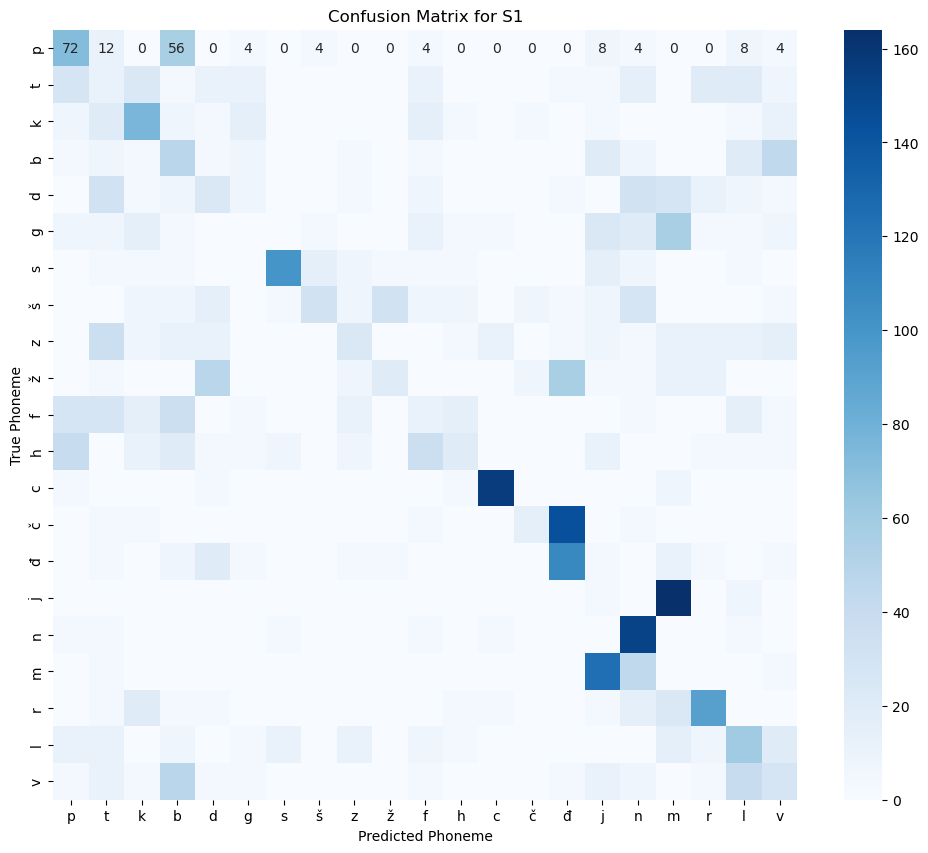

In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the phonemes
phonemes = ['p', 't', 'k', 'b', 'd', 'g', 's', 'š', 'z', 'ž', 'f', 'h', 'c', 'č', 'đ', 'j', 'n', 'm', 'r', 'l', 'v']

# Define the correct answers mapping
correct_answers = {
    'S1': {
        '01': 'p', '02': 't', '03': 'k', '04': 'b', '05': 'd', '06': 'g', '07': 's', '08': 'š', '09': 'z', '10': 'ž',
        '11': 'f', '12': 'h', '13': 'c', '14': 'č', '15': 'đ', '16': 'j', '17': 'n', '18': 'm', '19': 'r', '20': 'l',
        '21': 'v'
    }
}


# Initialize a confusion matrix DataFrame
confusion_matrix_data = pd.DataFrame(0, index=phonemes, columns=phonemes)

# Function to fill confusion matrix
def fill_confusion_matrix(combined_dict, correct_answers, confusion_matrix_data):
    for key, counts in combined_dict['S1'].items():
        true_phoneme = correct_answers['S1'][key]
        print(f"Processing {key} for true phoneme {true_phoneme}")
        for phoneme, count in counts.items():
            print(f"Adding {count} to cell ({true_phoneme}, {phoneme})")
            confusion_matrix_data.loc[true_phoneme, phoneme] += count

# Fill the confusion matrix for S1
fill_confusion_matrix(combined_dict, correct_answers, confusion_matrix_data)

# Print the confusion matrix to debug
print("Confusion Matrix Data:")
print(confusion_matrix_data)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix_data, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix for S1')
plt.xlabel('Predicted Phoneme')
plt.ylabel('True Phoneme')
plt.show()


    p   t   k   b   d   g  s  š  z  ž  ...  h  c  č  đ  j   n  m   r   l   v
p  72  12   0  56   0   4  0  4  0  0  ...  0  0  0  0  8   4  0   0   8   4
t  28  12  24   4  12  12  0  0  0  0  ...  0  0  0  4  4  16  0  20  20   8
k   8  20  76   8   4  16  0  0  0  0  ...  4  0  4  0  4   0  0   0   4  12
b   0   0   0   0   0   0  0  0  0  0  ...  0  0  0  0  0   0  0   0   0   0
d   0   0   0   0   0   0  0  0  0  0  ...  0  0  0  0  0   0  0   0   0   0
g   0   0   0   0   0   0  0  0  0  0  ...  0  0  0  0  0   0  0   0   0   0
s   0   0   0   0   0   0  0  0  0  0  ...  0  0  0  0  0   0  0   0   0   0
š   0   0   0   0   0   0  0  0  0  0  ...  0  0  0  0  0   0  0   0   0   0
z   0   0   0   0   0   0  0  0  0  0  ...  0  0  0  0  0   0  0   0   0   0
ž   0   0   0   0   0   0  0  0  0  0  ...  0  0  0  0  0   0  0   0   0   0
f   0   0   0   0   0   0  0  0  0  0  ...  0  0  0  0  0   0  0   0   0   0
h   0   0   0   0   0   0  0  0  0  0  ...  0  0  0  0  0   0  0   0   0   0

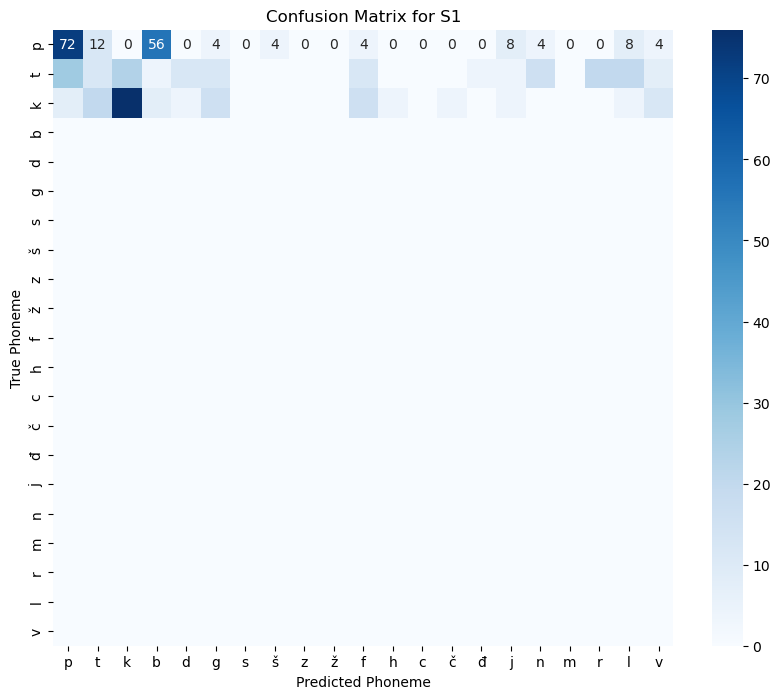

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the phonemes
phonemes = ['p', 't', 'k', 'b', 'd', 'g', 's', 'š', 'z', 'ž', 'f', 'h', 'c', 'č', 'đ', 'j', 'n', 'm', 'r', 'l', 'v']

# Define the phoneme mapping
phoneme_mapping = {1: 'p', 2: 't', 3: 'k', 4: 'b', 5: 'd', 6: 'g', 7: 's', 8: 'š', 9: 'z', 10: 'ž',
                   11: 'f', 12: 'h', 13: 'c', 14: 'č', 15: 'đ', 16: 'j', 17: 'n', 18: 'm', 19: 'r', 20: 'l', 21: 'v'}

# Initialize a confusion matrix DataFrame
confusion_matrix_data = pd.DataFrame(0, index=phonemes, columns=phonemes)

# Sample combined_dict for S1
combined_dict_s1 = {
    '01': {'p': 72, 'b': 56, 't': 12, 'j': 8, 'l': 8, 'g': 4, 'n': 4, 'v': 4, 'š': 4, 'f': 4},
    '02': {'p': 28, 'k': 24, 'l': 20, 'r': 20, 'n': 16, 't': 12, 'g': 12, 'd': 12, 'f': 12, 'v': 8, 'đ': 4, 'b': 4, 'j': 4},
    '03': {'k': 76, 't': 20, 'f': 16, 'g': 16, 'v': 12, 'b': 8, 'p': 8, 'j': 4, 'h': 4, 'd': 4, 'l': 4, 'č': 4}
    # Add more subsections here for S1
}

# Map the index '01' to phoneme 'p', '02' to 't', etc.
correct_answers = {str(i+1).zfill(2): phoneme for i, phoneme in enumerate(phonemes)}

# Loop through each entry in combined_dict_s1 and update confusion_matrix_data accordingly
for key, counts in combined_dict_s1.items():
    true_phoneme = correct_answers[key]  # Get the true phoneme
    for predicted_phoneme, count in counts.items():
        confusion_matrix_data.loc[true_phoneme, predicted_phoneme] += count

# Print the confusion matrix data to check
print(confusion_matrix_data)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_data, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix for S1')
plt.xlabel('Predicted Phoneme')
plt.ylabel('True Phoneme')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the correct answers for recorded answers in S1
correct_answers = {
    'S1': {
        '01': 'p', '02': 't', '03': 'k', '04': 'b', '05': 'd', '06': 'g', '07': 's', '08': 'š', '09': 'z', '10': 'ž',
        '11': 'f', '12': 'h', '13': 'c', '14': 'č', '15': 'đ', '16': 'j', '17': 'n', '18': 'm', '19': 'r', '20': 'l',
        '21': 'v'
    }
}

# Initialize a confusion matrix DataFrame
confusion_matrix_data = pd.DataFrame(0, index=correct_answers['S1'].values(), columns=correct_answers['S1'].values())

# Loop through each recorded answer and update the confusion matrix
for key, phoneme in correct_answers['S1'].items():
    confusion_matrix_data.loc[phoneme, phoneme] += 1

# Create a confusion matrix where rows represent true labels and columns represent predicted labels
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_data, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix for S1')
plt.xlabel('Predicted Phoneme')
plt.ylabel('True Phoneme')
plt.show()


In [71]:
# Transpose the DataFrame, excluding the first row (correct answers)
df_transposed = df_string.iloc[1:].T

# Extract correct answers from the first row
correct_answers = df_string.iloc[0]

# Create a DataFrame to store comparison results
comparison_df = df_transposed.copy()

# Compare responses against correct answers and populate the DataFrame
for col in comparison_df.columns:
    comparison_df[col] = comparison_df[col].eq(correct_answers[col]).astype(int)

print(comparison_df)

      1   2   3   4   5   6   7   8   9   10  ...  35  36  37  38  39  40  41  \
S101   0   0   1   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
S102   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
S103   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
S104   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
S105   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
S380   0   0   0   0   0   0   0   0   0   0  ...   0   0   1   0   0   0   0   
S381   0   0   0   0   0   0   0   0   0   0  ...   0   1   0   0   0   0   0   
S382   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   1   0   0   
S383   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
S384   0   0   1   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

      42  43  44  
S101   0

C:\Users\Mr Cab Driver\AppData\Local\Temp\ipykernel_11376\1028941060.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  comparison_df[col] = comparison_df[col].eq(correct_answers[col]).astype(int)
C:\Users\Mr Cab Driver\AppData\Local\Temp\ipykernel_11376\1028941060.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  comparison_df[col] = comparison_df[col].eq(correct_answers[col]).astype(int)
C:\Users\Mr Cab Driver\AppData\Local\Temp\ipykernel_11376\1028941060.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consis

In [60]:
keys_in_stats_dict = stats_dict.keys()
column_names_in_df_string = df_string.columns

print("Keys in stats_dict:", keys_in_stats_dict)
print("Column names in df_string:", column_names_in_df_string)


Keys in stats_dict: dict_keys(['S1', 'S2', 'S3'])
Column names in df_string: Index(['S101', 'S102', 'S103', 'S104', 'S105', 'S106', 'S107', 'S108', 'S109',
       'S110',
       ...
       'S375', 'S376', 'S377', 'S378', 'S379', 'S380', 'S381', 'S382', 'S383',
       'S384'],
      dtype='object', length=252)


In [52]:
from collections import defaultdict

# Create a defaultdict to store counts of phonemes for each suffix
s1_counts = defaultdict(lambda: defaultdict(int))

# Iterate through each suffix in S1 (S101 to S184)
for suffix in range(101, 185):
    # Get the suffix key as a string (e.g., 'S101')
    suffix_key = f"S{suffix}"
    
    # Extract the phonemes for the current suffix
    phonemes = df_string[suffix_key].iloc[0]
    
    # Count the occurrences of each phoneme in the current suffix
    for phoneme in phonemes:
        s1_counts[phoneme][suffix_key] += 1

# Combine counts for each phoneme across all suffixes
combined_counts = defaultdict(int)
for suffix_counts in s1_counts.values():
    for phoneme, count in suffix_counts.items():
        combined_counts[phoneme] += count

# Convert combined_counts to a list of tuples sorted by phoneme
combined_counts_sorted = sorted(combined_counts.items())

# Extract true labels and predicted labels from combined_counts_sorted
true_labels, predicted_labels = zip(*combined_counts_sorted)

# Convert true and predicted labels from phonemes to numerical labels using phoneme_mapping
phoneme_to_label = {phoneme: label for label, phoneme in phoneme_mapping.items()}
true_labels_numeric = [phoneme_to_label[label] for label in true_labels]
predicted_labels_numeric = [phoneme_to_label[label] for label in predicted_labels]

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels_numeric, predicted_labels_numeric)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=phoneme_mapping.values(), yticklabels=phoneme_mapping.values())
plt.xlabel('Predicted Phonemes')
plt.ylabel('True Phonemes')
plt.title('Confusion Matrix for S1')
plt.show()


KeyError: 'S101'